# CCD Parking Data Exploration

In [1]:
import os
import sys
sys.path.append('/home/simon/files/client/ccd/ccd-data-cleaning/')

%load_ext autoreload
%autoreload
%matplotlib inline

In [53]:
from ccd.utils import read_layers_from_gdb, show_image, series_profile

set the working directory

In [3]:
os.chdir('/home/simon/files/client/ccd/ccd-data-cleaning/')

In [4]:
pz_gdb = 'data/raw/ParkingZones.gdb'

In [5]:
sample_uuid = '{8EDBF341-6399-4A77-B90E-D4E34425145E}'

In [6]:
layers = read_layers_from_gdb(pz_gdb)

In [7]:
pz = layers['Parking_Zones']
pzr = layers['Parking_Zone_Regulations']
pza = layers['Parking_Zones__ATTACH']

In [133]:
ns = list(pzr[pzr['Regulation'] == 'No Stopping']['GUID'])

In [139]:
ns = pz[pz['GlobalID'].isin(ns)]

In [155]:
ns = ns.sort_values(by='Length')

In [156]:
ids = list(ns['GlobalID'])

In [170]:
ns['Length'].describe()

count    1515.000000
mean      107.678548
std       153.585208
min         3.000000
25%        22.100000
50%        44.000000
75%       130.900000
max      1707.500000
Name: Length, dtype: float64

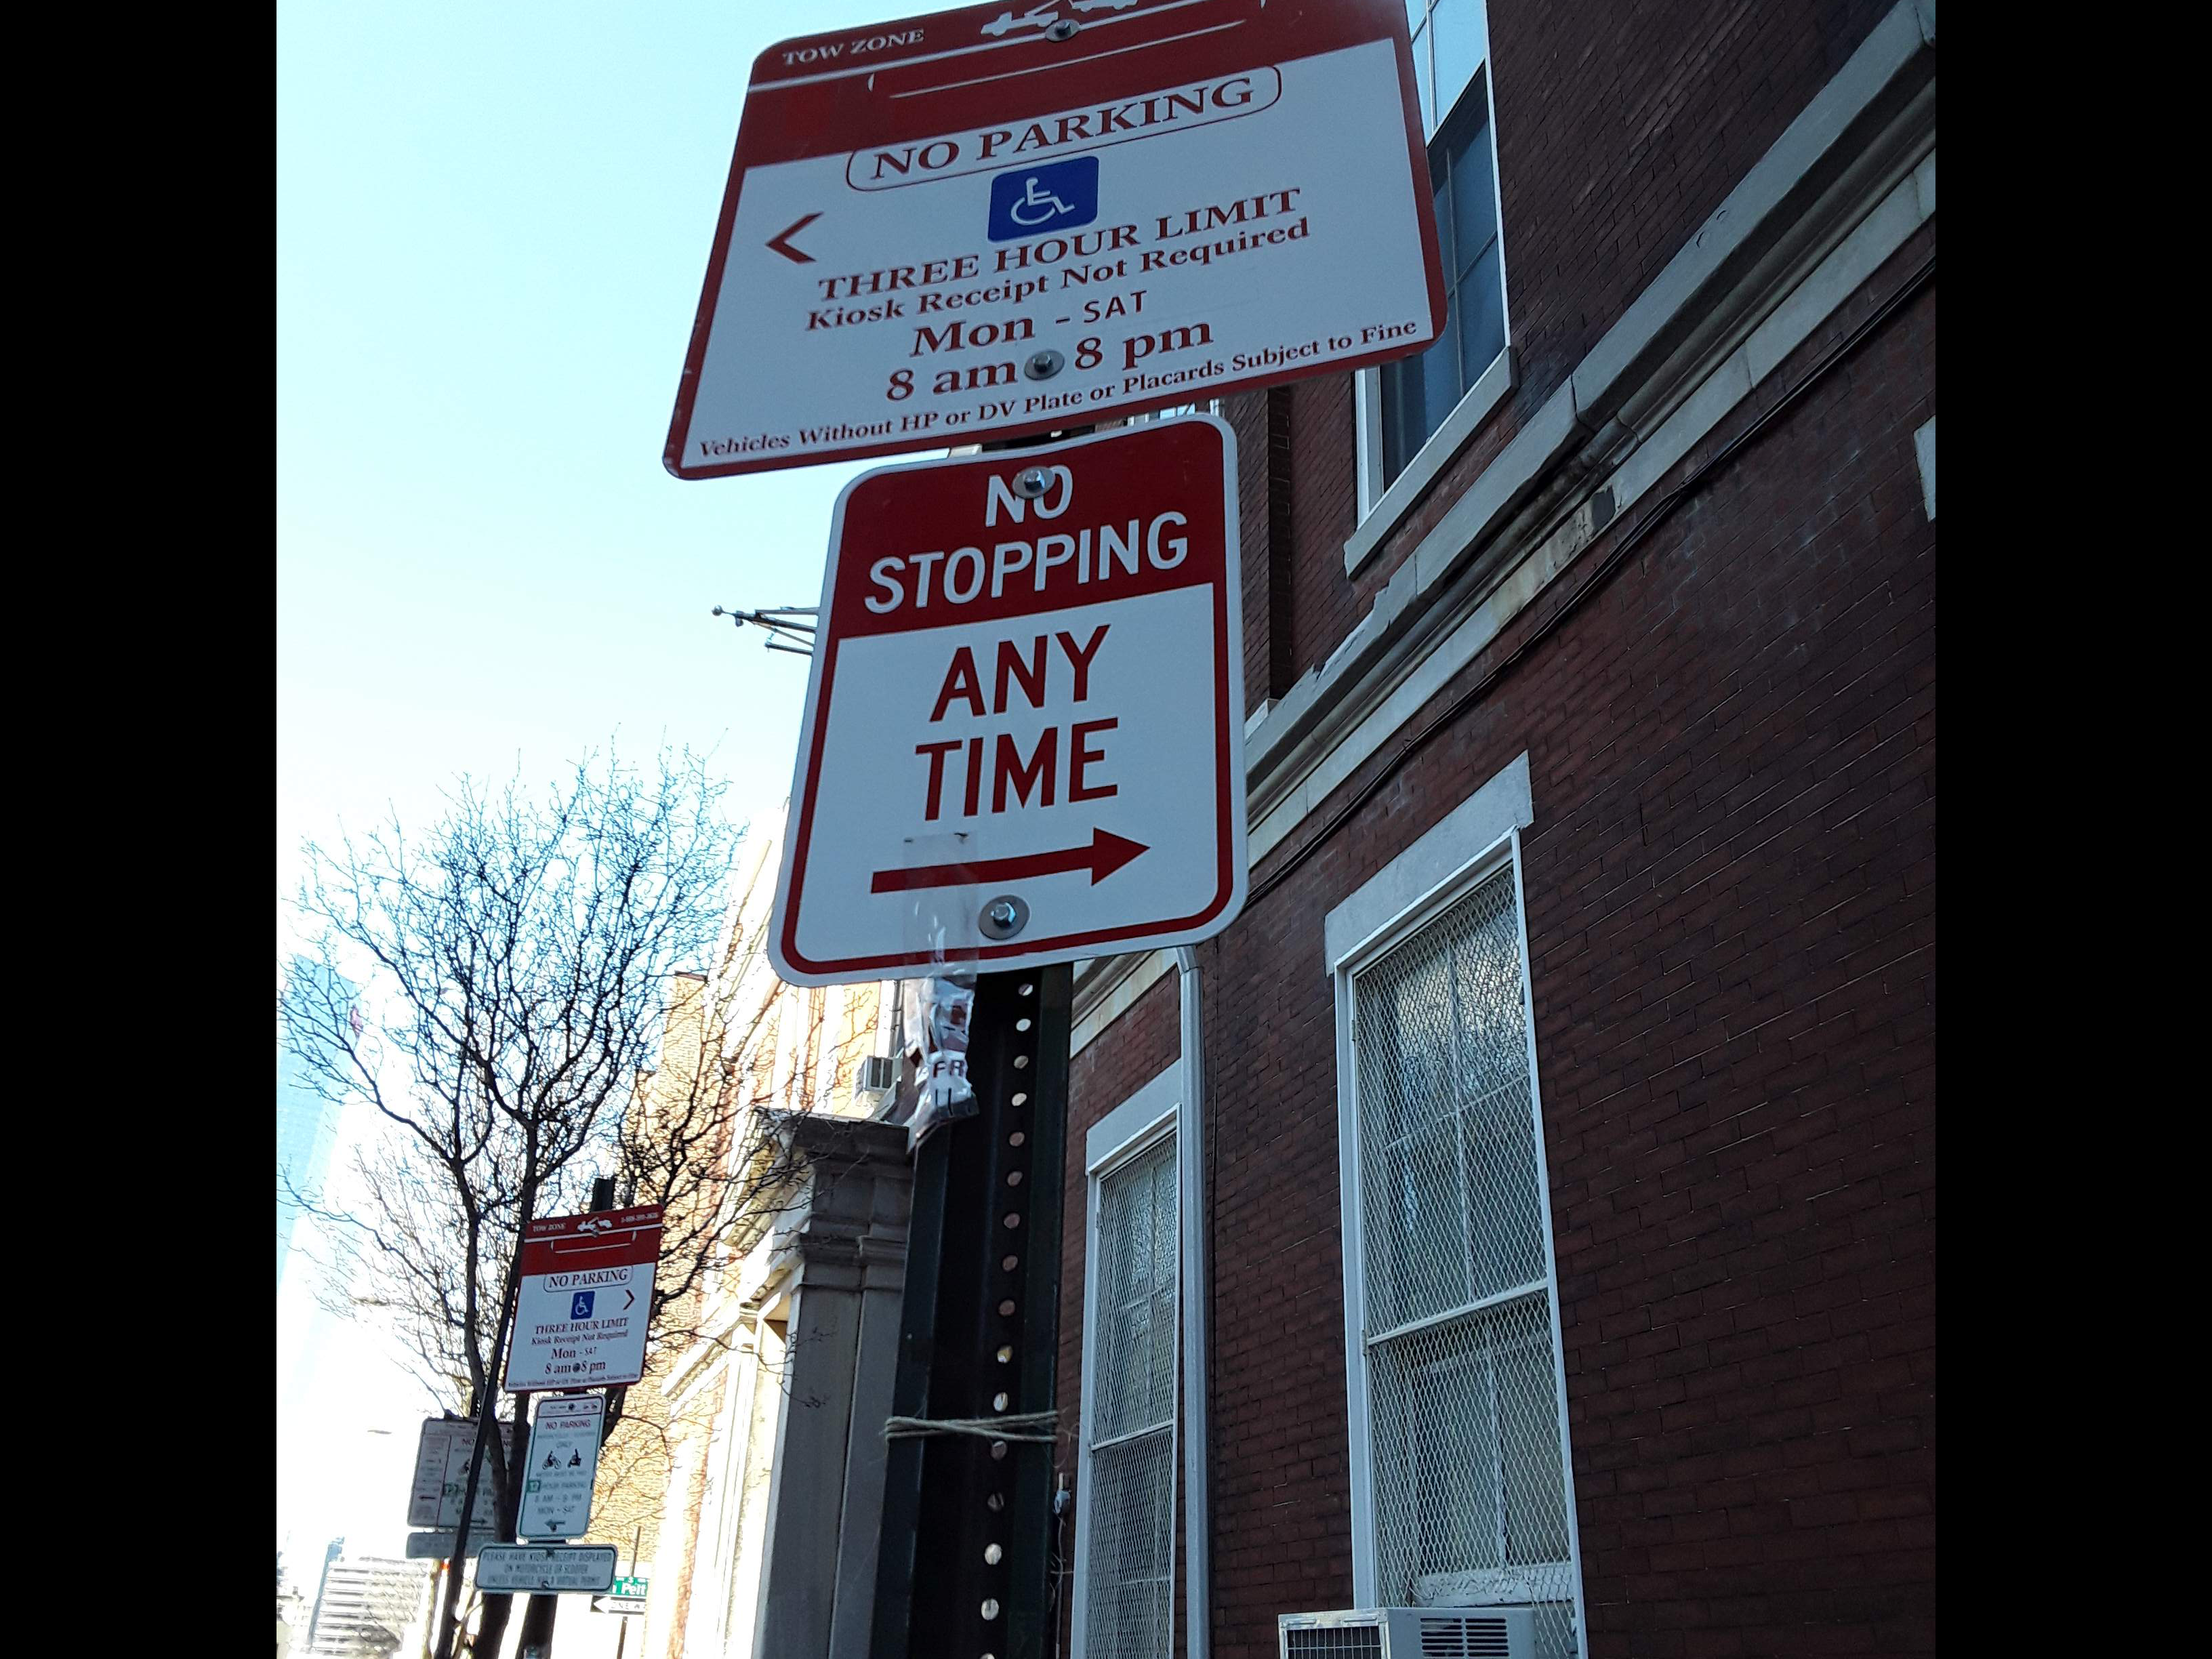

In [181]:
show_image(pza, ids[-700])

In [78]:
import pandas as pd

In [79]:
res = pd.read_csv('data/output/output-all.csv')

/home/simon/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Notes
4193 null values and 321 non-null values
133 unique values
value counts: 
{'tpp': 62, 'authorized vehicles only': 28, 'In This Street': 16, 'consul only': 14, 'registered package deliveries only': 11, 'no truck parking': 8, 'registered package delivery companies only': 6, 'At All Times': 6, 'no parking (authorized vehicles only)': 5, 'hotel loading only': 5, 'Consul Only': 5, 'city council only': 5, 'tpp ': 4, 'Except Restricted Hours': 4, 'fire house': 3, 'Consul Vehicle Only': 3, 'Restricted Hours': 3, 'Except Sunday': 3, 'No Stopping ': 3, 'Motorcycle and scooter ': 2, 'No Parking In This Street': 2, 'Bus Turns': 2, 'bus turns': 2, 'Except Saturday and Sunday': 2, 'authorized vehicles only zone c': 2, 'Tour Bus Loading Only': 2, 'authorized vehicles only zone J': 2, 'Authorized Vehicles Only': 2, 'ambulance zone': 2, 'press only': 2, 'love park authorized vehicles only valid park placard required': 2, 'motorcycle and scooter': 2, 'taxi stand': 1, 'city council only zone c': 1,

In [120]:
pzr[(pzr['Notes'] == 'tpp')]['Regulation'].value_counts()

Truck Parking Prohibited    62
Name: Regulation, dtype: int64

In [186]:
[np.isnan(x) for x in res['reg_is']]

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''